# Amazon Alexa Review Rating Classification Using Random Forests

## Step #1: Problem Statement
 - Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant, and feedback of various Amazon Alexa products like Alexa Echo and Echo Dots.
 - The objective is to discover insights into customer reviews and preform sentiment analysis on the data.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step #2: Import Data

In [24]:
df_alexa = pd.read_csv('Data\\amazon_alexa.tsv', sep='\t')
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [25]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [26]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
5       I received the echo as a gift. I needed anothe...
6       Without having a cellphone, I cannot use many ...
7       I think this is the 5th one I've purchased. I'...
8                                             looks great
9       Love it! I’ve listened to songs I haven’t hear...
10      I sent it to my 85 year old Dad, and he talks ...
11      I love it! Learning knew things with it eveyda...
12      I purchased this for my mother who is having k...
13                                     Love, Love, Love!!
14                               Just what I expected....
15                              I love it, wife hates it.
16      Really happy with this purchase.  Great speake...
17      We hav

In [27]:
df_alexa['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

## Step #3: Visualizing The Data

In [28]:
pos = df_alexa[df_alexa['feedback'] == 1]
neg = df_alexa[df_alexa['feedback'] == 0]

In [29]:
neg.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0


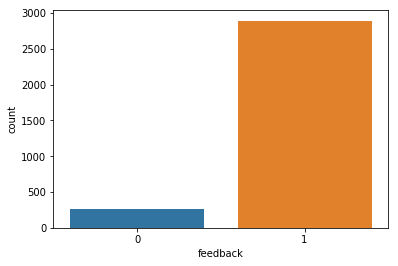

In [30]:
sns.countplot(df_alexa['feedback'], label='Count')

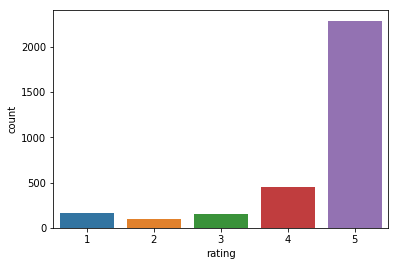

In [31]:
sns.countplot(df_alexa['rating'], label='Count')

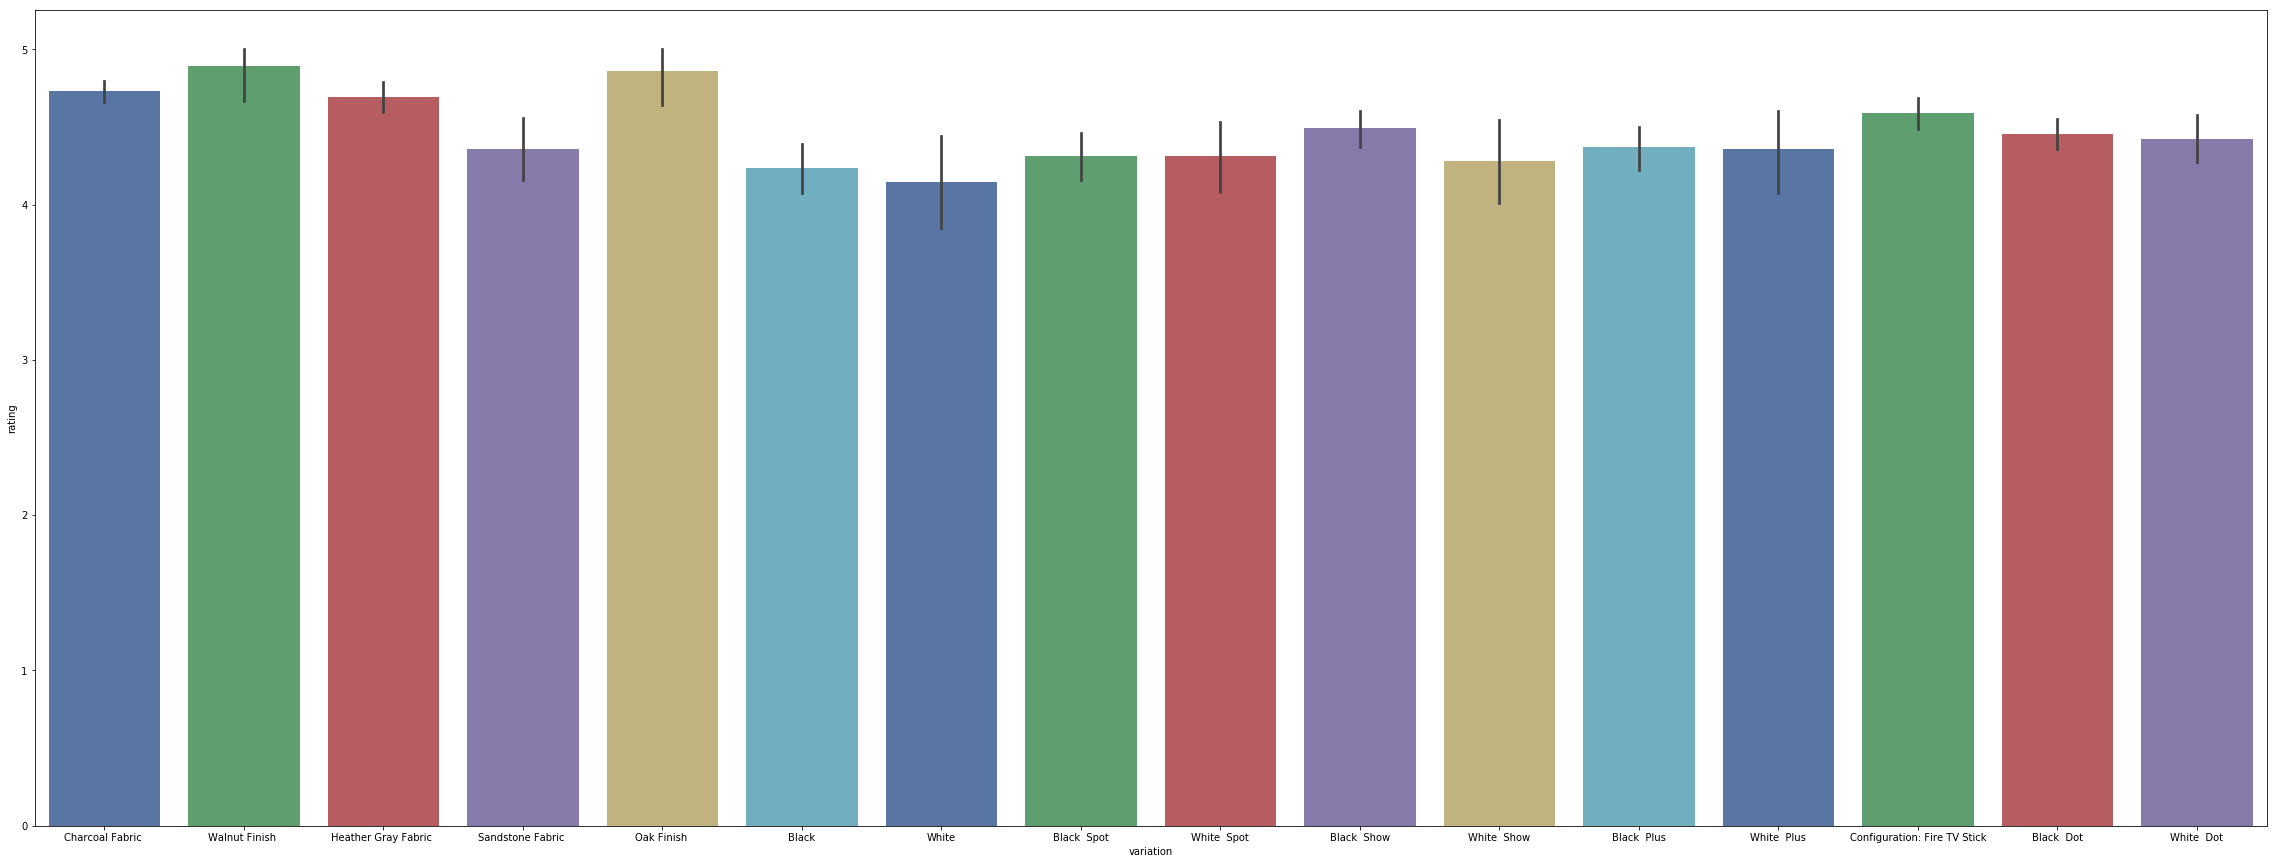

In [32]:
plt.figure(figsize=(40, 15))
sns.barplot(x='variation', y='rating', data=df_alexa, palette='deep')

## Step #4: Data Cleaning / Feature Engineering

In [33]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [34]:
df_alexa = df_alexa.drop(['date', 'rating'], axis=1)

In [35]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [36]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first=True)

In [38]:
df_alexa.drop(['variation'], axis=1, inplace=True)

In [40]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)

In [41]:
df_alexa.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vectorizer = CountVectorizer()
alexa_countvect = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [46]:
alexa_countvect.shape

(3150, 4044)

In [51]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [52]:
print(alexa_countvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
df_alexa.drop('verified_reviews', axis=1, inplace=True)

In [55]:
encoded_reviews = pd.DataFrame(alexa_countvect.toarray())

In [56]:
df_alexa = pd.concat([df_alexa, encoded_reviews], axis=1)

In [60]:
df_alexa.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X = df_alexa.drop('feedback', axis=1)
y = df_alexa['feedback']

## Step #5: Model Training

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=5)

In [78]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2520, 4059), (2520,), (630, 4059), (630,))

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_clf = RandomForestClassifier(n_estimators=150, criterion='entropy')

In [92]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Step #6: Evaluating the Model

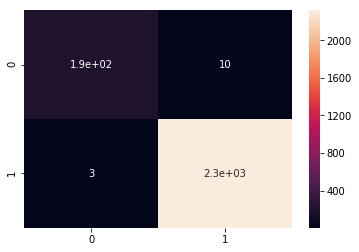

In [93]:
y_pred_train = rf_clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True);

In [94]:
print(classification_report(y_train, y_pred_train))

             precision    recall  f1-score   support

          0       0.98      0.95      0.97       198
          1       1.00      1.00      1.00      2322

avg / total       0.99      0.99      0.99      2520



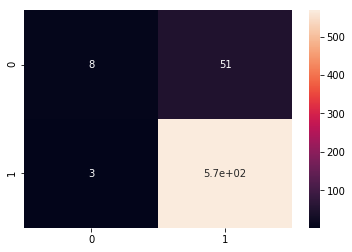

In [95]:
y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [96]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.14      0.23        59
          1       0.92      0.99      0.95       571

avg / total       0.90      0.91      0.89       630



## Step #7: Improve the Model

In [97]:
df_alexa = pd.read_csv('Data\\amazon_alexa.tsv', sep='\t')

In [98]:
df_alexa = pd.concat([df_alexa, pd.DataFrame(alexa_countvect.toarray())],
                     axis=1)

In [99]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Try to add feature length of review

In [100]:
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)

In [101]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [102]:
X = df_alexa.drop(['rating', 'date', 'variation', 'verified_reviews',
                    'feedback'], axis=1)

In [104]:
y = df_alexa['feedback']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=5)

In [108]:
rf_clf = RandomForestClassifier(n_estimators=300, criterion='entropy')
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

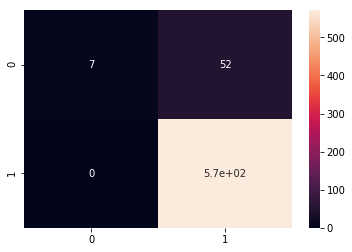

In [109]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [110]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.12      0.21        59
          1       0.92      1.00      0.96       571

avg / total       0.92      0.92      0.89       630



Slight improvement. Grid search could be next step. Also could run analysis with star rating to have multi-class problem.